# **Latar Belakang Project**

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal **PIKOBAR** milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.



# **Are You Ready?**

Dalam proyek ini, Anda akan diminta untuk melakukan eksplorasi dan analisis mengenai COVID-19 di Indonesia. Data yang Anda pergunakan diambil langsung dari API (Application Programming Interface) yang tersedia di covid19.go.id. Sehingga dalam proyek ini Anda akan mempelajari teknik mengambil data dari API, teknik mempersiapkan data, serta analisis dan visualisasi data.

# **Mengakses API covid19.go.id**
Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.

Salah satu cara untuk mengakses API adalah dengan menggunakan fungsi get() dari library requests.

Sekarang aktifkanlah library requests dan jalankan fungsi get() pada alamat API yang telah disebutkan! Simpan hasil fungsi tersebut dalam obyek bernama resp.

In [ ]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

# **Mengevaluasi Respon**
Saat Anda menjalankan fungsi get(), pada dasarnya hal yang terjadi adalah Anda membuat sebuah permintaan kepada server penyedia API. Permintaan Anda tersebut selanjutnya diproses dan dijawab oleh server sebagai sebuah respon. Objek resp yang telah Anda buat memiliki informasi respon oleh server.

Ada tiga informasi utama dalam sebuah respon API, yaitu status, headers, dan body. Status memiliki informasi apakah permintaan Anda berhasil atau tidak dan dinyatakan dalam status code, headers umumnya mengandung informasi metadata, sedangkan body berisikan konten atas permintaan yang telah dibuat.

# **Status Code**
Ada beberapa jenis status code yang umumnya dijumpai, antara lain:

* **200.** Artinya permintaan sukses dipenuhi.
* **404.**Artinya berkas yang diminta tidak dapat ditemukan.
* **500.**Artinya akses permintaan ditolak.
* **501.**Artinya terjadi kesalahan pada server.

Informasi lengkap mengenai jenis-jenis status code dapat Anda pelajari di https://restfulapi.net/http-status-codes/

Anda dapat mencetak **resp** secara langsung yang telah memberikan output status atas permintaan Anda melalui API. Sekarang coba lihatlah status atas permintaan yang telah Anda buat! Apakah permintaan Anda berhasil?

In [ ]:
print(resp)

<Response [200]>


# **Headers API**
Selamat status permintaan Anda melalui API sukses dipenuhi! Sekarang cobalah Anda jalankan attribut headers pada resp untuk mengetahui metadata apa saja yang tersimpan. Tampilkan dengan menggunakan fungsi print. 

Apakah isi dari elemen content-type?

Kapan terakhir kali informasi diperbaharui?

In [ ]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Tue, 03 Nov 2020 03:19:16 GMT', 'Content-Type': 'application/json', 'Last-Modified': 'Tue, 03 Nov 2020 03:18:40 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'ETag': 'W/"5fa0cc10-16f31"', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


# **Mengekstrak Isi Respon**
Respon API dengan status code 200 menyatakan bahwa permintaan Anda berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak. Selain itu Anda juga telah mengetahui lewat attribut headers bahwa konten yang diminta tersedia dalam bentuk application/json, yaitu berkas JSON.

Selanjutnya Anda dapat mengekstrak konten tersebut dengan menggunakan method json(). Method json() merupakan builtin JSON decoder untuk mengekstrak content bertipe JSON. Anda juga dapat menggunakan attribut content tetapi ini berupa binary content yang perlu Anda proses kembali nantinya. Jalankan method json() pada obyek resp dan simpanlah hasilnya sebagai cov_id_raw!

cov_id_raw ini bertipe data dict.

In [ ]:
cov_id_raw = resp.json()
print(cov_id_raw)

{'data': {'id': 1, 'jumlah_odp': 59500, 'jumlah_pdp': 0, 'total_spesimen': 4567608, 'total_spesimen_negatif': 2504158}, 'update': {'penambahan': {'jumlah_positif': 2618, 'jumlah_meninggal': 101, 'jumlah_sembuh': 3624, 'jumlah_dirawat': -1107, 'tanggal': '2020-11-02', 'created': '2020-11-02 16:07:58'}, 'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z', 'key': 1583107200000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 2}, 'jumlah_dirawat': {'value': 2}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'jumlah_dirawat_kum': {'value': 2}}, {'key_as_string': '2020-03-03T00:00:00.000Z', 'key': 1583193600000, 'doc_count': 1, 'jumlah_meninggal': {'value': 0}, 'jumlah_sembuh': {'value': 0}, 'jumlah_positif': {'value': 0}, 'jumlah_dirawat': {'value': 0}, 'jumlah_positif_kum': {'value': 2}, 'jumlah_sembuh_kum': {'value': 0}, 'jumlah_meninggal_kum': {'value': 0}, 'juml

# **Mengekstrak isi Respon - 2**
Dengan menggunakan fungsi len() dan method keys() cobalah amati ada berapa komponen serta apa saja nama komponen dalam obyek cov_id_raw tersebut! Kemudian ekstraklah key ke-2 dan simpan dengan nama cov_id_update.

In [ ]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


# **Analisa Data**
Sekarang Anda diminta untuk fokus pada obyek cov_id_update untuk menjawab pertanyaan-pertanyaan berikut:

Kapan tanggal pembaharuan data penambahan kasus?

Berapa jumlah penambahan kasus sembuh?

Berapa jumlah penambahan kasus meninggal?

Berapa jumlah total kasus positif hingga saat ini?

Berapa jumlah total kasus meninggal hingga saat ini?

In [ ]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2020-11-02
Jumlah penambahan kasus sembuh : 3624
Jumlah penambahan kasus meninggal : 101
Jumlah total kasus positif hingga saat ini : 415402
Jumlah total kasus meninggal hingga saat ini: 14044


# **Apa Kabar Kalimantan Timur?**
Anda telah berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia dengan menggunakan data yang langsung diambil menggunakan API. Namun bagaimana jika Anda ingin berfokus dengan data COVID-19 di provinsi tempat menetap saat ini?

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Kalimatan Timur, tempat tinggal saya sekarang, tersedia di https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_TIMUR.json.



In [ ]:
import requests
resp_kaltim = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_TIMUR.json')
cov_kaltim_raw = resp_kaltim.json()

# **Memahami Kasus COVID-19 di Kalimantan Timur**
Sekarang jalankanlah method keys() pada cov_kaltim_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

Berapa jumlah total kasus COVID-19 di Kalimantan Timur?
Berapa persentase kematian akibat COVID-19 di Kalimantan Timur?
Berapa persentase tingkat kesembuhan dari COVID-19 di Kalimantan Timur?

In [ ]:
print('Nama-nama elemen utama:\n', cov_kaltim_raw.keys())
print('\nJumlah total kasus COVID-19 di Kalimantan Timur : %d' %cov_kaltim_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Kalimantan Timur : %f.2%%' %cov_kaltim_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Timur : %f.2%%' %cov_kaltim_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Kalimantan Timur : 14345
Persentase kematian akibat COVID-19 di Kalimantan Timur : 3.401882.2%
Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Timur : 80.174277.2%


# **Memperoleh Informasi yang Lebih Lengkap**

Informasi umum mengenai COVID-19 di Kalimantan Timur telah Anda dapatkan. Namun informasi akan lebih lengkap jika Anda memiliki data perkembangan COVID-19 dari waktu ke waktu, apakah Anda setuju?

Kabar baiknya adalah informasi tersebut juga disediakan oleh covid19.go.id melalui permintaan API yang telah Anda buat sebelumnya. Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. Silakan Anda ekstrak data tersebut dari cov_kaltim_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. Kemudian simpanlah hasilnya sebagai obyek bernama cov_kaltim! Amati struktur cov_kaltim menggunakan method info() dan head().

In [ ]:
import numpy as np
import pandas as pd
cov_kaltim = pd.DataFrame(cov_kaltim_raw['list_perkembangan'])
print('Info cov_kaltim:\n', cov_kaltim.info())
print('\nLima data teratas cov_kaltim:\n', cov_kaltim.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       234 non-null    int64
 1   KASUS                         234 non-null    int64
 2   MENINGGAL                     234 non-null    int64
 3   SEMBUH                        234 non-null    int64
 4   DIRAWAT_OR_ISOLASI            234 non-null    int64
 5   AKUMULASI_KASUS               234 non-null    int64
 6   AKUMULASI_SEMBUH              234 non-null    int64
 7   AKUMULASI_MENINGGAL           234 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  234 non-null    int64
dtypes: int64(9)
memory usage: 16.6 KB
Info cov_kaltim:
 None

Lima data teratas cov_kaltim:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1584144000000      3  ...                    0                             3
1  158423040000

# **Menjinakkan Data**

Setelah mengekstrak dan mengamati cov_kaltim, Anda menemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Sekarang Anda akan mencoba melakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data cov_kaltim, yaitu:

* Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
* Merubah format penulisan semua kolom menjadi huruf kecil
* Mengganti nama kolom kasus menjadi kasus_baru
* Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime


Lengkapilah baris kode berikut untuk melakukan menjinakan data sesuai dengan tahapan yang telah Anda rencanakan! Anda akan menggunakan teknik chaining pada dataframe. Simpan hasil pengolahan Anda dengan nama cov_kaltim_tidy.

In [ ]:
cov_kaltim_tidy = (cov_kaltim.drop(columns=[item for item in cov_kaltim.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_kaltim_tidy['tanggal'] = pd.to_datetime(cov_kaltim_tidy['tanggal']*1e6, unit='ns')
print('Lima data terbawah:\n', cov_kaltim_tidy.tail())

Lima data terbawah:
        tanggal  kasus_baru  meninggal  sembuh
229 2020-10-29         208          5     275
230 2020-10-30         205          1     253
231 2020-10-31         116         10     269
232 2020-11-01         168          5     185
233 2020-11-02          86          2     250


# **Menunjukkan Melalui Gambar**
Akhirnya Anda berhasil menjinakan data cov_kaltim menjadi cov_kaltim_tidy sehingga lebih mudah untuk diolah, selamat! Memiliki data yang rapi memang menyenangkan, apakah Anda setuju dengan hal tersebut?

Setelah memiliki data yang jinak, sekarang saatnya Anda mengekspresikan data tersebut dalam bentuk lain yang harapannya lebih mudah dicerna: grafik. Anda akan memulai merancang visualisasi yang memiliki estetika dengan menggunakan library matplotlib. Imporlah library tersebut sebagai aliasnya!

In [ ]:
import matplotlib.pyplot as plt

# **Menunjukkan Melalui Gambar - 2**
Berikut merupakan template kode untuk membuat visualisasi menggunakan matplotlib:

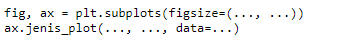


Berdasarkan templat tersebut, komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (.scatter()), line-chart memerlukan geometri garis (.plot()), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (.bar()).

Lengkapi baris kode berikut untuk membuat bar-chart jumlah kasus baru harian COVID-19 di Kalimantan Timur menggunakan data cov_kaltim_tidy! Pergunakan kolom tanggal sebagai sumbu-x.

<Figure size 432x288 with 0 Axes>

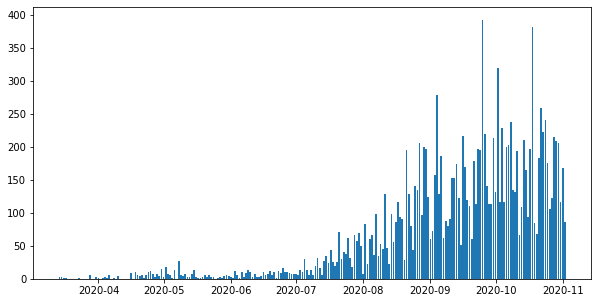

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_kaltim_tidy, x='tanggal', height='kasus_baru')
plt.show()

# **Informasi pada Grafik**
Anda telah berhasil membuat bar-chart yang diminta. Namun grafik tersebut belum memiliki informasi yang jelas serta cenderung membosankan untuk dilihat. Sekarang silakan buat kembali grafik tersebut dengan menggunakan baris kode yang telah dimodifikasi berikut:



<Figure size 432x288 with 0 Axes>

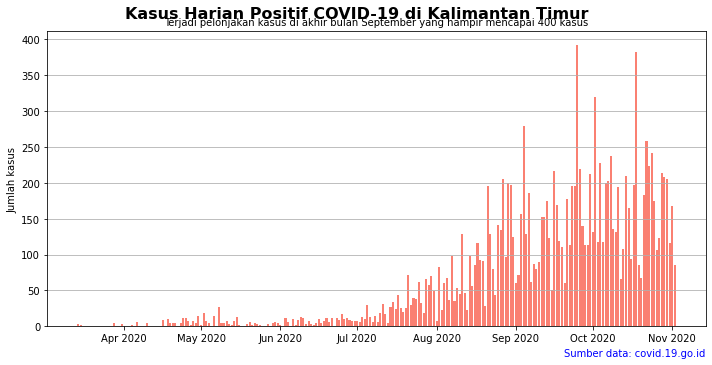

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_kaltim_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Kalimantan Timur',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di akhir bulan September yang hampir mencapai 400 kasus',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Grafik untuk Kasus Sembuh**
Sekarang buatlah grafik serupa dengan menggunakan data kasus sembuh menggunakan warna olivedrab!

<Figure size 432x288 with 0 Axes>

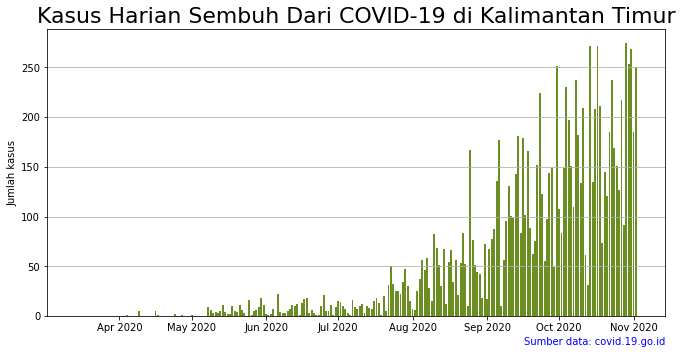

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_kaltim_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Kalimantan Timur',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Grafik untuk Kasus Meninggal**
Sekarang buatlah grafik serupa dengan menggunakan data kasus meninggal menggunakan warna slategrey!



<Figure size 432x288 with 0 Axes>

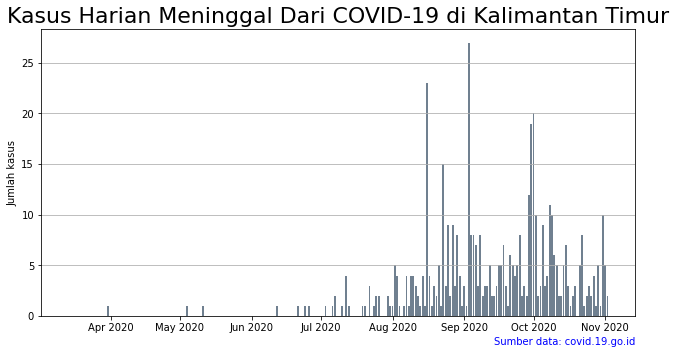

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_kaltim_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Kalimantan Timur',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Apakah Pekan ini Lebih Baik?**
Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

Anda dapat dengan mudah mengerjakannya Anda sudah dibantu melalui predefined code, yaitu set terlebih dahulu kolom tanggal pada cov_kaltim_tidy sebagai index. Kemudian terapkan method pada time series di pandas, resampling per pekan dan gunakan agregasi penjumlahan. Adapun yang akan digunakan untuk mengekstrak informasi pekan dalam satu tahun adalah weekofyear dan year untuk tahun.

Lengkapilah baris kode berikut untuk menghitung pertambahan kasus pekanan dan simpanlah hasilnya sebagai cov_kaltim_pekanan! Anda juga diminta untuk menggunakan method info() dan .head() untuk melakukan inspeksi data.

In [ ]:
cov_kaltim_pekanan = (cov_kaltim_tidy.set_index('tanggal')['kasus_baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus_baru': 'jumlah'})
)
cov_kaltim_pekanan['tahun'] = cov_kaltim_pekanan['tanggal'].apply(lambda x: x.year)
cov_kaltim_pekanan['pekan_ke'] = cov_kaltim_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_kaltim_pekanan = cov_kaltim_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_kaltim_pekanan:')
print(cov_kaltim_pekanan.info())
print('\nLima data terbaru cov_kaltim_pekanan:\n', cov_kaltim_pekanan.tail())

Info cov_kaltim_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     35 non-null     int64
 1   pekan_ke  35 non-null     int64
 2   jumlah    35 non-null     int64
dtypes: int64(3)
memory usage: 968.0 bytes
None

Lima data terbaru cov_kaltim_pekanan:
     tahun  pekan_ke  jumlah
30   2020        41    1217
31   2020        42    1222
32   2020        43    1234
33   2020        44    1140
34   2020        45      86


<Figure size 432x288 with 0 Axes>

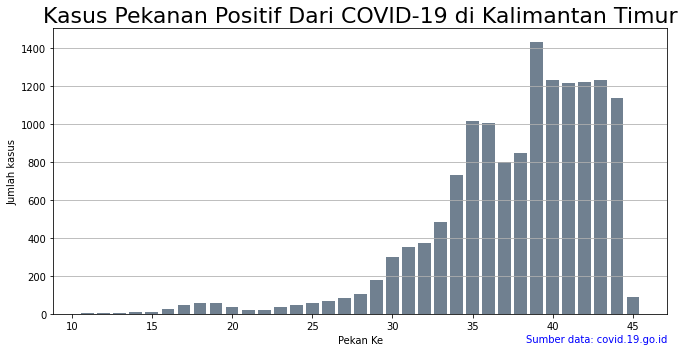

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_kaltim_pekanan, x='pekan_ke', height='jumlah', color='slategrey')
ax.set_title('Kasus Pekanan Positif Dari COVID-19 di Kalimantan Timur',
fontsize=22)
ax.set_xlabel('Pekan Ke')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Menjawab Pertanyaan**
Pertanyaan baru muncul di benak Anda setelah melakukan inspeksi terhadap data cov_kaltim_pekanan tersebut: "Apakah pekan ini lebih baik dari pekan kemarin?"

Demi menjawab hal tersebut Anda melakukan kalkulasi sederhana dengan tahapan berikut:

Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama jumlah_pekanlalu.
Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0
Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu. Hasil komparasi ini disimpan dalam kolom baru dengan nama lebih_baik, isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu
Lengkapilah baris predefined kode yang diberikan untuk mengerjakan tahapan yang telah Anda rencanakan! Anda akan menggunakan method shift() untuk membuat kolom jumlah_pekanlalu. Inspeksi hasil pekerjaan Anda dengan menggunakan head(10)!

In [ ]:
cov_kaltim_pekanan['jumlah_pekanlalu'] = cov_kaltim_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_kaltim_pekanan['lebih_baik'] = cov_kaltim_pekanan['jumlah'] < cov_kaltim_pekanan['jumlah_pekanlalu']

print('Sepuluh data terbaru:\n', cov_kaltim_pekanan.tail(10))

Sepuluh data terbaru:
     tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
25   2020        36    1007              1019        True
26   2020        37     799              1007        True
27   2020        38     850               799       False
28   2020        39    1434               850       False
29   2020        40    1236              1434        True
30   2020        41    1217              1236        True
31   2020        42    1222              1217       False
32   2020        43    1234              1222       False
33   2020        44    1140              1234        True
34   2020        45      86              1140        True


# **Membuat Bar Chart**
Anda sungguh luar biasa! Dengan menggunakan data hasil perhitungan tersebut maka sekarang Anda dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

Salin dan jalankan kode berikut di konsol Anda!

<Figure size 432x288 with 0 Axes>

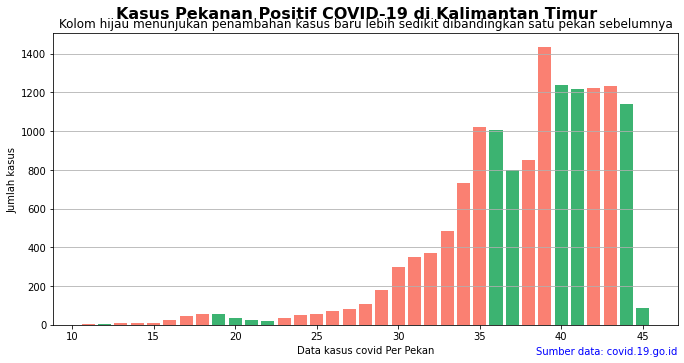

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_kaltim_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_kaltim_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Kalimantan Timur',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('Data kasus covid Per Pekan')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Pola dan Dinamika**
Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain di diri Anda: "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi.

Informasi ini sebenarnya telah disediakan di dalam respon API covid19.go.id yang Anda minta. Namun tidak ada salahnya jika Anda mencoba menghitungnya sendiri, apakah Anda setuju?

Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal. Anda dapat menggunakan method cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik. Lengkapilah baris kode berikut untuk menghitung jumlah akumulasi kasus aktif, kasus sembuh, dan kasus meninggal!

In [ ]:
cov_kaltim_akumulasi = cov_kaltim_tidy[['tanggal']].copy()
cov_kaltim_akumulasi['akumulasi_aktif'] = (cov_kaltim_tidy['kasus_baru'] - cov_kaltim_tidy['sembuh'] - cov_kaltim_tidy['meninggal']).cumsum()
cov_kaltim_akumulasi['akumulasi_sembuh'] = cov_kaltim_tidy['sembuh'].cumsum()
cov_kaltim_akumulasi['akumulasi_meninggal'] = cov_kaltim_tidy['meninggal'].cumsum()
cov_kaltim_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
229,2020-10-29,2755,10542,470
230,2020-10-30,2706,10795,471
231,2020-10-31,2543,11064,481
232,2020-11-01,2521,11249,486
233,2020-11-02,2355,11499,488


# **Membuat Line Chart**
Sekarang cobalah Anda buat line-chart pola kasus aktif dengan menggunakan method plot pada ax

<Figure size 432x288 with 0 Axes>

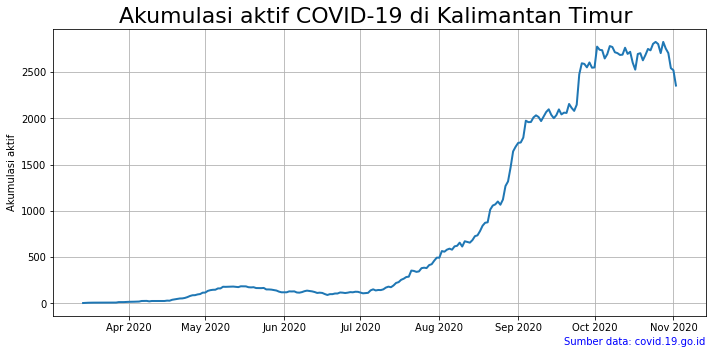

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_kaltim_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Kalimantan Timur ',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

# **Kabar Buruk dan Kabar Baik**
Sebagai penutup analisis dalam proyek ini Anda diminta untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.

Ada dua pilihan cara yang dapat Anda tempuh untuk membuat grafik tersebut:

1. Menggunakan data frame cov_kaltim_akumulasi, kemudian langsung melakukan line plot dan memilih warna garis yang sesuai untuk membedakan; atau
2. Menggunakan ax.plot() dan mengisikan kolom-kolom yang masing-masingnya menjadi x dan y dengan data=cov_kaltim_akumulasi, dan kemudian menset warna berbeda untuk ketiga line plot.

# **Tahap Terakhir**
Anda hampir selesai! Pada tahap terakhir ini Anda cukup salin dan jalankan baris kode berikut di konsol untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal:

<Figure size 432x288 with 0 Axes>

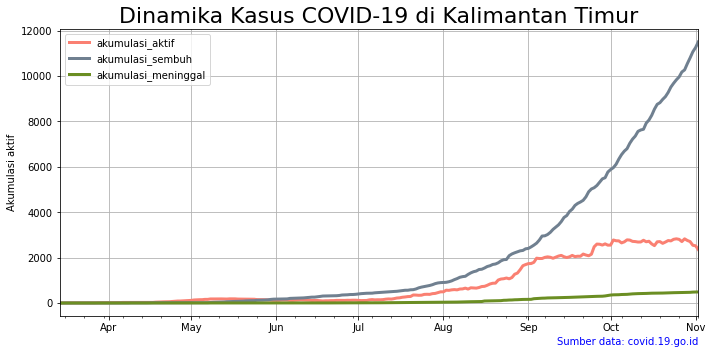

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_kaltim_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Kalimantan Timur',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()

Selamat Anda telah menyelesaikan proyek analisis COVID-19 ini! Anda telah berhasil melakukan impor data melalui API, melakukan transformasi data, serta membuat visualisasi untuk mengkomunikasikan hasil analisis data tentang COVID-19. Anda dipersilakan untuk selanjutnya mengembangkan analisis dengan cara mengambil studi kasus provinsi lain atau bahkan melakukan komparasi antar provinsi.

Dengan berhasilnya Anda menyelesaikan proyek analisis ini, semoga Anda tetap sehat, waspada dan tetap tenang dalam menghadapi pandemi COVID-19. Selamat dan sukses selalu!